## Project 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
food_data= pd.read_csv("BIOL250FoodProject.csv")

In [3]:
food_data

Plant Name Plant Part Eaten  Energy (kcal)  Protein (g)  \
0               Almonds     Seeds (nuts)            579        21.20   
1           Brazil Nuts     Seeds (nuts)            659        14.30   
2   Chestnuts (Chinese)     Seeds (nuts)            224         4.20   
3        Macadamia Nuts     Seeds (nuts)            718         7.91   
4              Hazelnut     Seeds (nuts)            628        15.00   
..                  ...              ...            ...          ...   
59             Radishes             Root             16         0.68   
60             Rutabaga             Root             37         1.08   
61         Sweet Potato             Root             86         1.57   
62               Turnip             Root             28         0.90   
63              Carrots             Root             41         0.93   

    Total Lipids (g)  Carbohydrates (g)  Fiber, total dietary (g)  \
0              49.90              21.60                      12.5   
1              67.10              11.70                       7.5   
2               1.11              49.10                       5.1   
3              75.80              13.80                       8.6   
4              60.80              16.70                       9.7   
..               ...                ...                       ...   
59              0.10               3.40                       1.6   
60              0.16               8.62                       2.3   
61              0.05              20.10                       3.0   
62              0.10               6.43                       1.8   
63              0.24               9.58                       2.8   

    Vitamin A (μm)  Vitamin C (mg)  Vitamin D (D2 + D3) (μg)  Thiamin (mg)  \
0                0             0.0                         0         0.205   
1                0             0.7                         0         0.617   
2               10            36.0                         0         0.160   
3                0             1.2                         0         1.200   
4                1             6.3                         0         0.643   
..             ...             ...                       ...           ...   
59               0            14.8                         0         0.012   
60               0            25.0                         0         0.090   
61             709             2.4                         0         0.078   
62               0            21.0                         0         0.040   
63             835             5.9                         0         0.066   

    Niacin (mg)  
0         3.620  
1         0.295  
2         0.800  
3         2.470  
4         1.800  
..          ...  
59        0.254  
60        0.700  
61        0.557  
62        0.400  
63        0.983  

[64 rows x 12 columns]

In [4]:
#Put high carbs and low carbs into table to pivot with
temp = food_data[['Protein (g)', 'Plant Part Eaten', 'Vitamin A (μm)']]
Protein = temp[temp['Protein (g)'] > 0].groupby(['Vitamin A (μm)', 'Plant Part Eaten']).mean().reset_index()

In [8]:
p = Protein.pivot(index = 'Vitamin A (μm)', columns= 'Plant Part Eaten', values= 'Protein (g)')
p

Plant Part Eaten  Flower     Fruit  Leaves      Root  Seeds (legumes)  \
Vitamin A (μm)                                                          
0                   1.92  0.350000     NaN  0.886667        19.891667   
1                   3.27  0.670000     NaN       NaN        21.700000   
2                    NaN  0.700000     NaN       NaN        24.600000   
3                    NaN  0.701667     NaN       NaN        22.000000   
4                    NaN  1.060000     NaN       NaN              NaN   
5                   1.28  0.650000     NaN       NaN              NaN   
7                    NaN  1.960000     NaN       NaN              NaN   
8                   2.57       NaN     NaN       NaN              NaN   
9                    NaN  3.270000     NaN       NaN              NaN   
10                   NaN  1.210000     NaN       NaN              NaN   
17                   NaN  0.880000     NaN       NaN              NaN   
18                   NaN  0.860000     NaN       NaN              NaN   
22                   NaN  0.500000     NaN       NaN              NaN   
25                   NaN       NaN    0.90       NaN              NaN   
26                   NaN       NaN     NaN       NaN              NaN   
28                   NaN  0.610000     NaN       NaN              NaN   
34                   NaN  0.810000     NaN       NaN              NaN   
35                   NaN  1.830000     NaN       NaN              NaN   
38                   NaN       NaN     NaN       NaN              NaN   
42                   NaN  0.880000     NaN       NaN              NaN   
50                   NaN       NaN    2.00       NaN              NaN   
169                  NaN  0.840000     NaN       NaN              NaN   
370                  NaN       NaN    1.36       NaN              NaN   
709                  NaN       NaN     NaN  1.570000              NaN   
835                  NaN       NaN     NaN  0.930000              NaN   

Plant Part Eaten  Seeds (nuts)  Stem  
Vitamin A (μm)                        
0                       12.988  2.57  
1                       11.580   NaN  
2                       24.100   NaN  
3                       14.985   NaN  
4                          NaN   NaN  
5                          NaN   NaN  
7                          NaN   NaN  
8                          NaN   NaN  
9                          NaN   NaN  
10                       4.200   NaN  
17                         NaN   NaN  
18                         NaN   NaN  
22                         NaN  0.69  
25                         NaN   NaN  
26                      20.200   NaN  
28                         NaN   NaN  
34                         NaN   NaN  
35                         NaN   NaN  
38                         NaN  2.20  
42                         NaN   NaN  
50                         NaN   NaN  
169                        NaN   NaN  
370                        NaN   NaN  
709                        NaN   NaN  
835                        NaN   NaN

Note: After dozens of attempts pivoting this dataset into an efficient chart, we have found that due to the overwhelming amount of quantitative data in the dataset all having unique values in each column, the above data set was the best option of showing a useful informational display.

The above data will display the amount of a part of a plant will provide based on how much vitamin A it provides. You can visualize this by showing a clustered group of each plant part based on their vitamin count. Instead displayed will be the protein count in grams based on the name of the plant and the plant part. This could be used by a dietician, for example, to show to a client for an easier depiction of what they should and should not eat.


Text(0.5, 1.0, 'Protein Provided Per Plant Part')

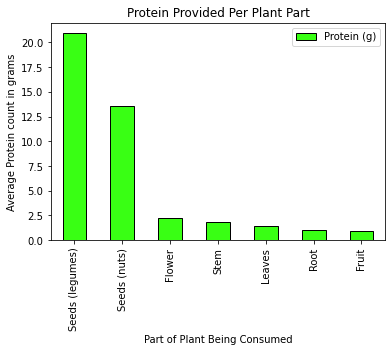

In [6]:
#Comparisson between The plant part eaten with how much protein they provide.
temp = food_data[['Plant Part Eaten', 'Protein (g)']].groupby('Plant Part Eaten').mean()
temp = temp.sort_values('Protein (g)', ascending = False)
temp.plot.bar(color= '#39FF14', edgecolor = 'black')
plt.xlabel('Part of Plant Being Consumed')
plt.ylabel('Average Protein count in grams')
plt.title('Protein Provided Per Plant Part')

The graph above represents how much protein each plant provides. It is split based on which part of the plant is consumed so some catagories are much higher in protein count. One conclusion that can be made is that Seeds provide much more protein than any other part of plant based foods. Finding the mean of the different data sets would help show how reliable the data is comparatively to each other.
You could hypothesize which plants/nuts are good to eat for a person with a certain illness. For example nuts with Vitamin A or C would be good for one type of sickness and from there, if given certain sicknesses, you would be able to pair which plants pair with what sickness.

## What Extra features can you compute from the data?

One option of an extra feature is to compute when certain foods are eaten. If we had the data of when each plant is grown, we could deduce from the dataset when certain plants are eaten. A particular plant might be eaten during the summer when it is at peak harvest season. A deeper analysis could be finding which plants are most effective at dealing with certain sicknesses. For example: A plant is harvested and produced in Winter when many people are getting colds. This plant is highly effective at helping people overcome sickness. On the other hand a plant might be harvested and at peak production in summer when it is primarily known to help sicknesses in Winter. This would be a much less effective plant than the former at serving this purpose.